In [2]:
install.packages(c("ggrepel", "readxl", "ggpubr", "viridis", "dplyr", "gghalves", "VennDiagram"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(ggplot2)
library(data.table)
library(ggrepel)
library(readxl)
library(ggpubr)
library(viridis)
library(dplyr)
library(gghalves)
library(VennDiagram)


Loading required package: viridisLite


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

Loading required package: futile.logger


Attaching package: ‘VennDiagram’


The following object is masked from ‘package:ggpubr’:

    rotate




##Loading data
##Clinical information obtaning from cBioportal

In [18]:
clinical <- fread("https://raw.githubusercontent.com/bacdao/LAML/ec25149de27096858447f92ea7a07af36263801c/Figure1/data/data_clinical_patient.txt?token=GHSAT0AAAAAACCXN7GEA4F4A5UMD7RENPGUZG2CQOA", sep = "\t", header = T)

In [20]:
head(clinical)

#Other Patient ID,Patient Identifier,Form completion date,Sex,Race Category,Ethnicity Category,Prior Cancer Diagnosis Occurence,Neoadjuvant Therapy Type Administered Prior To Resection Text,Karnofsky Performance Score,Performance Status,⋯,ICD-10 Classification,"International Classification of Diseases for Oncology, Third Edition ICD-O-3 Histology Code","International Classification of Diseases for Oncology, Third Edition ICD-O-3 Site Code",Informed consent verified,Project code,Primary Other Site of Disease Name,Tissue Source Site,Tumor Tissue Site,Overall Survival Status,Overall Survival (Months)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
#Legacy DMP patient identifier (DMPnnnn),Identifier to uniquely specify a patient.,Form completion date,Sex,The text for reporting information about race.,The text for reporting information about ethnicity.,Text term to describe the patient's history of prior cancer diagnosis and the spatial location of any previous cancer occurrence.,Text term to describe the patient's history of neoadjuvant treatment and the kind of treament given prior to resection of the tumor.,"Score from the Karnofsky Performance status scale, representing the functional capabilities of a person.",The functional level of the patient based on the Zubrod performance scale.,⋯,10th revision of the International Statistical Classification of Diseases and Related Health Problems.,"The third edition of the International Classification of Diseases for Oncology, published in 2000, used principally in tumor and cancer registries for coding the site (topography) and the histology (morphology) of neoplasms._The study of the structure of the cells and their arrangement to constitute tissues and, finally, the association among these to form organs. In pathology, the microscopic process of identifying normal and abnormal morphologic characteristics in tissues, by employing various cytochemical and immunocytochemical stains._A system of numbered categories for representation of data.","The third edition of the International Classification of Diseases for Oncology, published in 2000, used principally in tumor and cancer registries for coding the site (topography) and the histology (morphology) of neoplasms._The description of an anatomical region or of a body part._Named locations of, or within, the body._A system of numbered categories for representation of data.",Informed consent verified,Project code,A text description of an 'other' originating or primary anatomic site of the disease/condition under investigation or review.,"A Tissue Source Site collects samples (tissue, cell, or blood) and cliincal metadata which are then sent to tha Biospecimen Core Resource.",Text term that describes the anatomic site of the tumor or disease.,Overall patient survival status.,Overall survival in months since initial diagonosis.
#STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING,NUMBER,NUMBER,⋯,STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING,NUMBER
#1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
OTHER_PATIENT_ID,PATIENT_ID,FORM_COMPLETION_DATE,SEX,RACE,ETHNICITY,HISTORY_OTHER_MALIGNANCY,HISTORY_NEOADJUVANT_TRTYN,KARNOFSKY_PERFORMANCE_SCORE,ECOG_SCORE,⋯,ICD_10,ICD_O_3_HISTOLOGY,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,PROJECT_CODE,PRIMARY_SITE_OTHER,TISSUE_SOURCE_SITE,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS
b93cb62a-a7dc-406d-8482-6b51a92ea3c3,TCGA-AB-2802,12/14/10,Male,WHITE,NOT HISPANIC OR LATINO,No,No,[Not Available],[Not Available],⋯,[Not Available],[Not Available],[Not Available],YES,[Not Available],[Not Applicable],AB,Bone Marrow,1:DECEASED,11.99
fb4c9803-3690-4f6a-9402-72a4f36d64d1,TCGA-AB-2803,12/14/10,Female,WHITE,NOT HISPANIC OR LATINO,No,No,[Not Available],[Not Available],⋯,[Not Available],[Not Available],[Not Available],YES,[Not Available],[Not Applicable],AB,Bone Marrow,1:DECEASED,26.02


##Labeling the 173 samples into 2 group 'FLT3 Mutant' and 'FLT3 wildtype'


In [22]:
designTSV <- fread("https://raw.githubusercontent.com/bacdao/LAML/main/Figure1/data/design.tsv?token=GHSAT0AAAAAACCXN7GEFGVLEFV2X3AVCI3SZG2CXXA", sep="\t", header=T)
head(designTSV)

Title,Group
<chr>,<chr>
TCGA-AB-2803-03,FLT3 Wild_type
TCGA-AB-2805-03,FLT3 Wild_type
TCGA-AB-2806-03,FLT3 Wild_type
TCGA-AB-2807-03,FLT3 Wild_type
TCGA-AB-2808-03,FLT3 Wild_type
TCGA-AB-2810-03,FLT3 Wild_type


# DEGs file from cbioportal

In [23]:
deg <- fread("https://raw.githubusercontent.com/bacdao/LAML/main/Figure1/data/deg.tsv?token=GHSAT0AAAAAACCXN7GF2OXM2B57XWHOTNMKZG2DFGA", sep = "\t", header = T)
head(deg)

Gene,Cytoband,(A) FLT3 mutation,(B) FLT3 non mutation,(A) FLT3 mutation,(B) FLT3 non mutation,Log Ratio,p-Value,q-Value,Higher expression in
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SDC1,2p24.1,0.59,1.49,0.40,1.05,-0.90,8.72e-14,1.70e-09,(B) FLT3 non mutation
LGALS3BP,17q25,6.21,4.08,1.38,2.07,2.14,1.43e-12,1.39e-08,(A) FLT3 mutation
AMPD1,1p13.2,0.21,0.75,0.26,0.69,-0.54,4.33e-12,2.81e-08,(B) FLT3 non mutation
ADAM6,14q32.33,3.97,5.50,1.09,1.64,-1.53,6.67e-11,2.28e-07,(B) FLT3 non mutation
HID1,17q25.1,0.32,0.81,0.27,0.65,-0.48,7.97e-11,2.28e-07,(B) FLT3 non mutation
SCNN1B,16p12.2-p12.1,0.08,0.28,0.09,0.28,-0.20,8.83e-11,2.28e-07,(B) FLT3 non mutation


#Most anti-correlated probes file from cbioportal


In [25]:
acp <- fread("https://raw.githubusercontent.com/bacdao/LAML/main/Figure1/data/acp.tsv?token=GHSAT0AAAAAACCXN7GFTKMRKWMXTVZA5IA6ZG2DHDA", header = T, sep = "\t")
head(acp)

Gene,Cytoband,(A) FLT3 mutation,(B) FLT3 non mutation,(A) FLT3 mutation,(B) FLT3 non mutation,Log Ratio,p-Value,q-Value,Higher methylation in
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
TREML2,6p21.1,0.14,0.25,0.09,0.14,-0.11,8.39e-09,4.342e-05,(B) FLT3 non mutation
CDH24,14q11.2,0.32,0.50,0.16,0.20,-0.18,1.03e-08,4.342e-05,(B) FLT3 non mutation
LGALS3BP,17q25,0.26,0.46,0.18,0.21,-0.20,1.19e-08,4.342e-05,(B) FLT3 non mutation
CCL1,17q12,0.10,0.20,0.07,0.15,-0.10,2.35e-08,6.407e-05,(B) FLT3 non mutation
BTBD6,14q32.33,0.08,0.19,0.03,0.20,-0.11,4.21e-08,9.179e-05,(B) FLT3 non mutation
MARK2,11q13.1,0.04,0.13,0.03,0.16,-0.09,6.71e-08,1.221e-04,(B) FLT3 non mutation


##Keeping the useful information

In [26]:
deg_filter <- data.frame(deg$Gene,deg$`Log Ratio`,deg$`q-Value`)
acp_filter <- data.frame(acp$Gene,acp$`Log Ratio`,acp$`q-Value`)

##Changing the colnames

In [27]:
colnames(deg_filter) <- c("gene","Log2FC","qvalue")
rownames(deg_filter) <- deg_filter$gene

colnames(acp_filter) <- c("gene","Delta","qvalue")


##Synchronizing the sample name

In [28]:
designTSV$Title <- substring(designTSV$Title, 1, 12)

##Only keeping 173 samples

In [29]:
clinical <- subset(clinical, clinical$`Patient Identifier` %in% designTSV$Title)

clinical_merged <- merge(clinical, designTSV, by.x = 'Patient Identifier', by.y = 'Title')

#1.FIGURE_1.A

##Boxplot for comparing age at diagnosis

In [30]:
colnames(clinical_merged) <- gsub('Diagnosis Age', 'Age', colnames(clinical_merged))

In [69]:
clinical_merged$Age <- as.numeric(clinical_merged$Age)

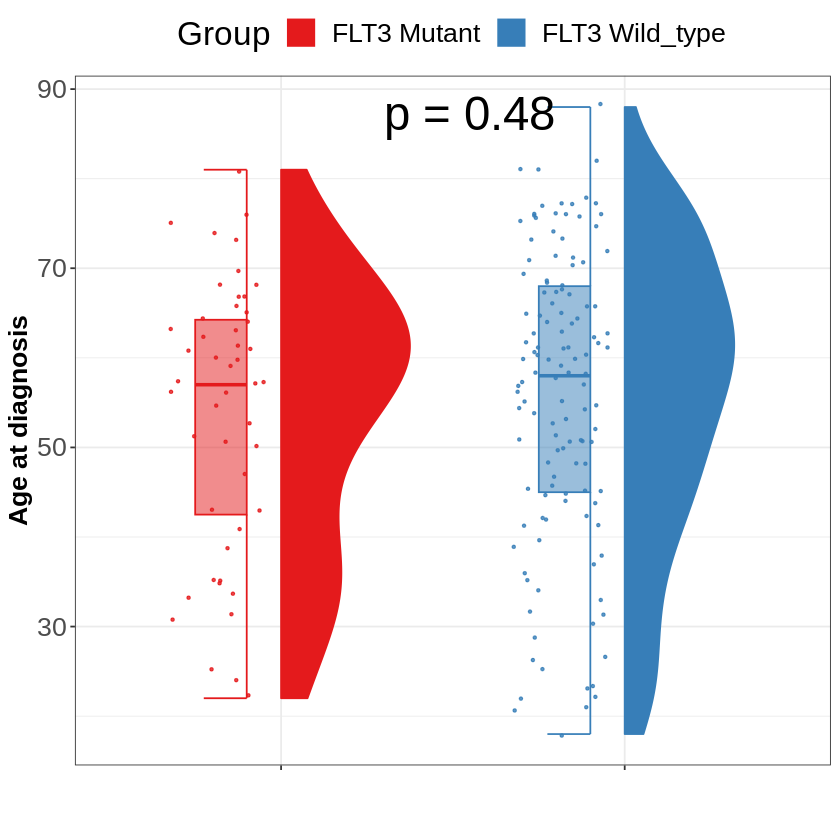

In [70]:
ggplot(clinical_merged, aes(x=Group, y=Age)) + theme_bw() + geom_half_point(aes(y=Age, fill=Group, color=Group), side="l", size=0.6, alpha=0.8) + geom_half_boxplot(aes(y=Age, color=Group, fill=Group), side="l", width=0.5, alpha=0.5, nudge=0.1, outlier.size=0) + geom_half_violin(aes(y=Age, fill=Group, color=Group), side="r") + stat_compare_means(label = "p.format", label.x = 1.4, size=10, vjust=0.7) + theme(text = element_text(size=20),axis.title.y= element_text(size=16, face="bold"), legend.position="top") + scale_x_discrete(labels=c("","")) + xlab("") + ylab("Age at diagnosis") + scale_fill_brewer(palette="Set1") + scale_color_brewer(palette="Set1")

##Stacked bar plot for comparing Gender percentage

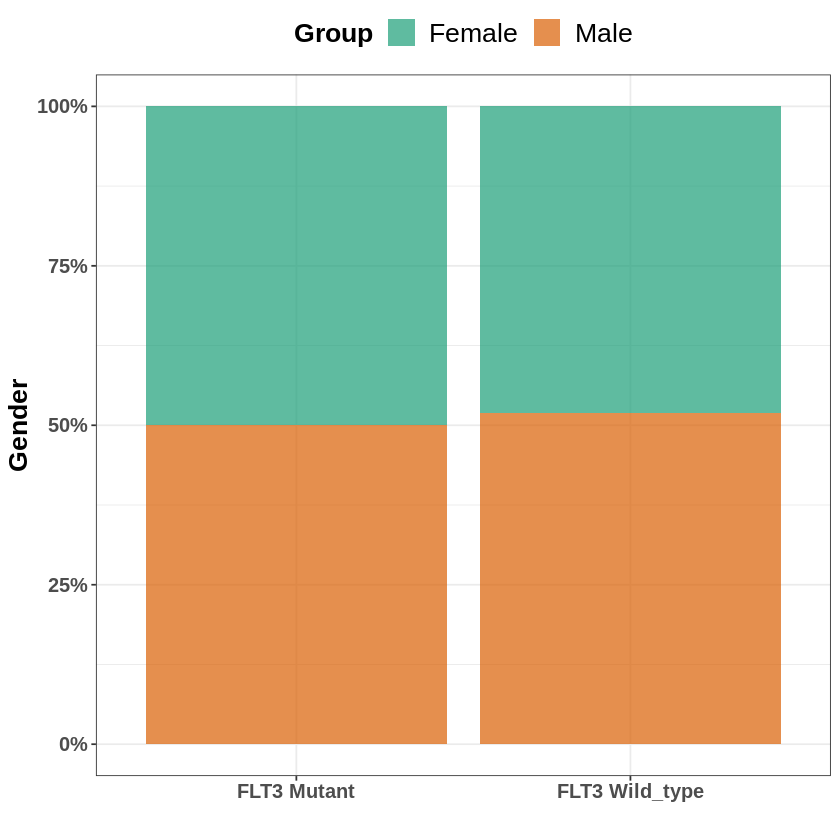

In [32]:
ggplot(clinical_merged, aes(x = Group, fill = factor(Sex))) +
  geom_bar(position = "fill", alpha = 0.7) +
  scale_fill_brewer(palette="Dark2") +  # Set colors for females and males
  labs(x = "", y = "Gender", fill = "Group") +
  theme_bw() +
  theme(
    axis.text = element_text(size = 12, face = "bold"),
    axis.title = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 16, face = "bold"),
    legend.position = "top",
    legend.text = element_text(size = 16)
  ) +
  scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), labels = scales::percent(c(0, 0.25, 0.5, 0.75, 1)))

####Perform Chi-square test

In [35]:
chisq_result <- chisq.test(table(clinical_merged$Group, clinical_merged$Sex))
chisq_result$p.value

[1] 0.9475453

##Comparing 'FAB' classification plot

In [38]:
install.packages("RColorBrewer")
library(RColorBrewer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



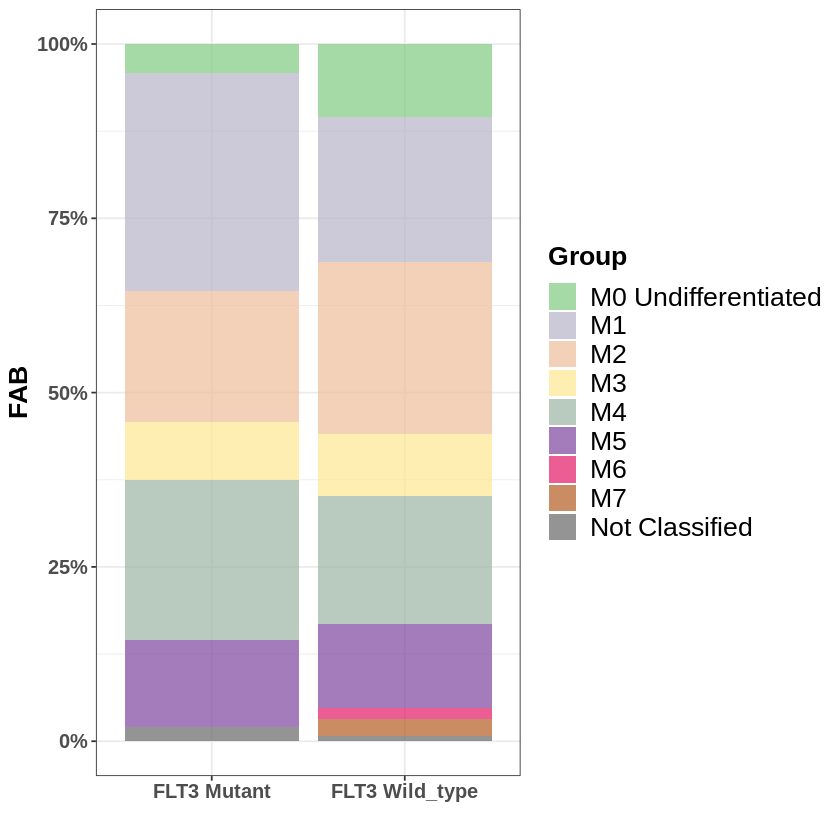

In [42]:
ggplot(clinical_merged, aes(x = Group, fill = factor(FAB))) +
  geom_bar(position = "fill", alpha = 0.7) +
  scale_fill_manual(values = colorRampPalette(brewer.pal(8, "Accent"))(9)) +  # Set colors for females and males
  labs(x = "", y = "FAB", fill = "Group") +
  theme_bw() +
  theme(
    axis.text = element_text(size = 12, face = "bold"),
    axis.title = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 16, face = "bold"),
    legend.position = "right",
    legend.text = element_text(size = 16)
  ) +
  scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), labels = scales::percent(c(0, 0.25, 0.5, 0.75, 1)))

In [44]:
fisher_result <- fisher.test(table(clinical_merged$Group, clinical_merged$FAB))
fisher_result


	Fisher's Exact Test for Count Data

data:  table(clinical_merged$Group, clinical_merged$FAB)
p-value = 0.6469
alternative hypothesis: two.sided


#1.FIGURE_1.B

##Volcano plot

In [45]:
deg_filter$diffexpressed <- "NO"
deg_filter$diffexpressed[deg_filter$Log2FC >= 0.5 & deg_filter$qvalue < 0.05] <- "UP"
deg_filter$diffexpressed[deg_filter$Log2FC <= -0.5 & deg_filter$qvalue < 0.05] <- "DOWN"
deg_filter$diffexpressed[abs(deg_filter$Log2FC) < 0.5 & deg_filter$qvalue < 0.05] <- "FDR"
deg_filter$label <- ifelse(deg_filter$diffexpressed != c("NO","FDR"), deg_filter$gene, "")


Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”
Warning message:
“ggrepel: 479 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


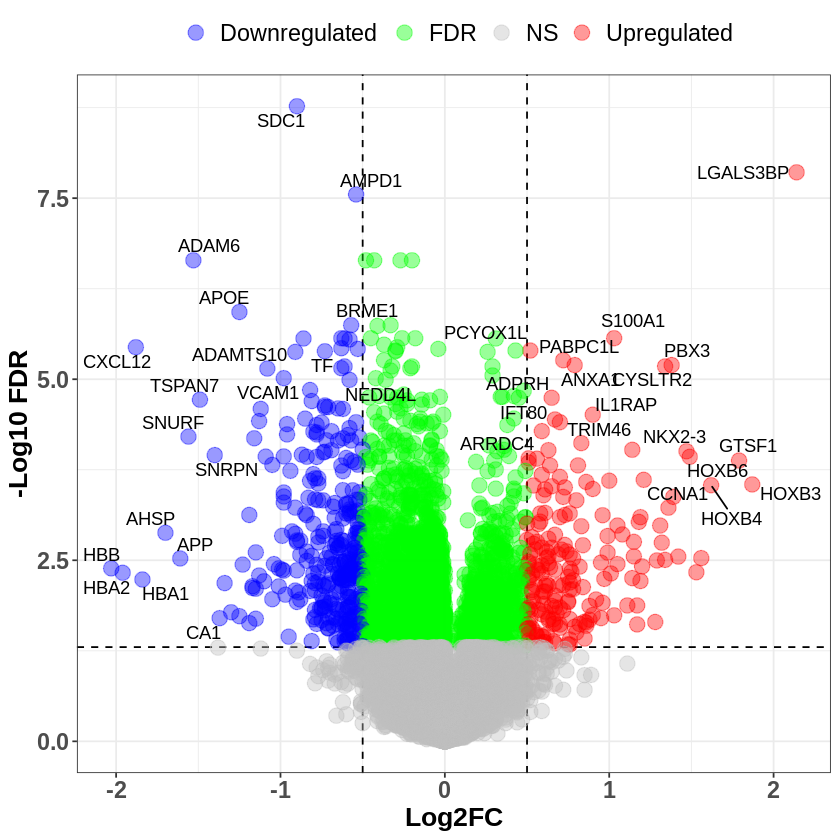

In [46]:
ggplot(data = deg_filter, aes(x = Log2FC, y = -log10(qvalue), col = diffexpressed)) +
  geom_vline(xintercept = c(-0.5, 0.5), col = "black", linetype = 'dashed') +
  geom_hline(yintercept = -log10(0.05), col = "black", linetype = 'dashed') +
  geom_point(size = 4, alpha = 0.4) +
  scale_color_manual(
    values = c("blue", "green", "grey", "red"),
    labels = c("Downregulated", "FDR", "NS", "Upregulated")
  ) + theme_bw() +
  theme(
    text = element_text(size = 12),
    legend.position = "top",
    legend.box = "vertical",
    legend.text = element_text(size = 14),
    axis.text = element_text(size = 14, face = "bold"),
    axis.title = element_text(size = 16, face = "bold")
  ) +
  labs(x = "Log2FC", y = "-Log10 FDR", color = "") +
  guides(alpha = FALSE, col = guide_legend(override.aes = list(label = ""))) +
  geom_text_repel(data = subset(deg_filter, abs(Log2FC) >= 0.5 & qvalue < 0.05), aes(label = gene), color = "black")

In [47]:
deg_filter$Exp <- ifelse(deg_filter$Log2FC>=0, "Up-regulated genes", "Down-regulated genes")

table(subset(deg_filter, deg_filter$qvalue<0.05)$Exp)


Down-regulated genes   Up-regulated genes 
                1816                 1020 

###Retaining genes with log2FC >= |0.5|

In [48]:
table(subset(deg_filter, deg_filter$qvalue<0.05 & abs(deg_filter$Log2FC) >=0.5)$Exp)


Down-regulated genes   Up-regulated genes 
                 318                  193 

#1.FIGURE_1.C

##Venn Diagram

In [49]:
#Build function for Venn diagram in R
display_venn <- function(x, ...){
  library(VennDiagram)
  grid.newpage()
  venn_object <- venn.diagram(x, filename = NULL, ...)
  grid.draw(venn_object)
}

###Venn diagram for overlapping between significant DEGs (qvalue <0.05) and genes contains differentially methylated most anti-correlated probes

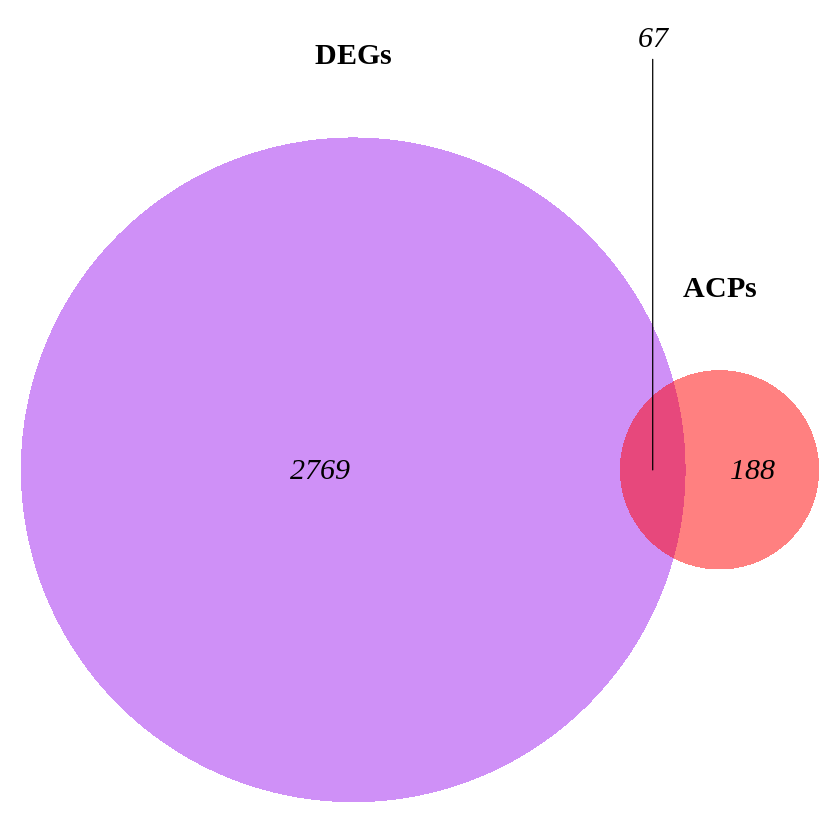

In [50]:
venn1 <- list(A=subset(deg_filter,deg_filter$qvalue<0.05)$gene, B=acp_filter$gene)

display_venn(
  venn1,
  category.names = c("DEGs" , "ACPs"), lwd=1, lty ="blank",
  fill = c("purple", "red"), cex= 1.5, fontface= "italic", dist=c(0.05,0.05), cat.cex =1.5, cat.fontface="bold", cat.pos=c(0,0), cat.dist=c(0.05, 0.05) )


#1.FIGURE_1.D

##Bar plot

In [52]:
#Merge DEG with qvalue < 0.05 and acp
deg.acp <- merge(subset(deg_filter, deg_filter$qvalue<0.05), acp_filter, by.x="gene", by.y="gene")
table(deg.acp$Exp)


Down-regulated genes   Up-regulated genes 
                  34                   33 

In [53]:
deg.acp$Meth <- ifelse(deg.acp$Delta >=0, "Hyper-methylated probes", "Hypo-methylated probes")
table(deg.acp$Meth)


Hyper-methylated probes  Hypo-methylated probes 
                      7                      60 

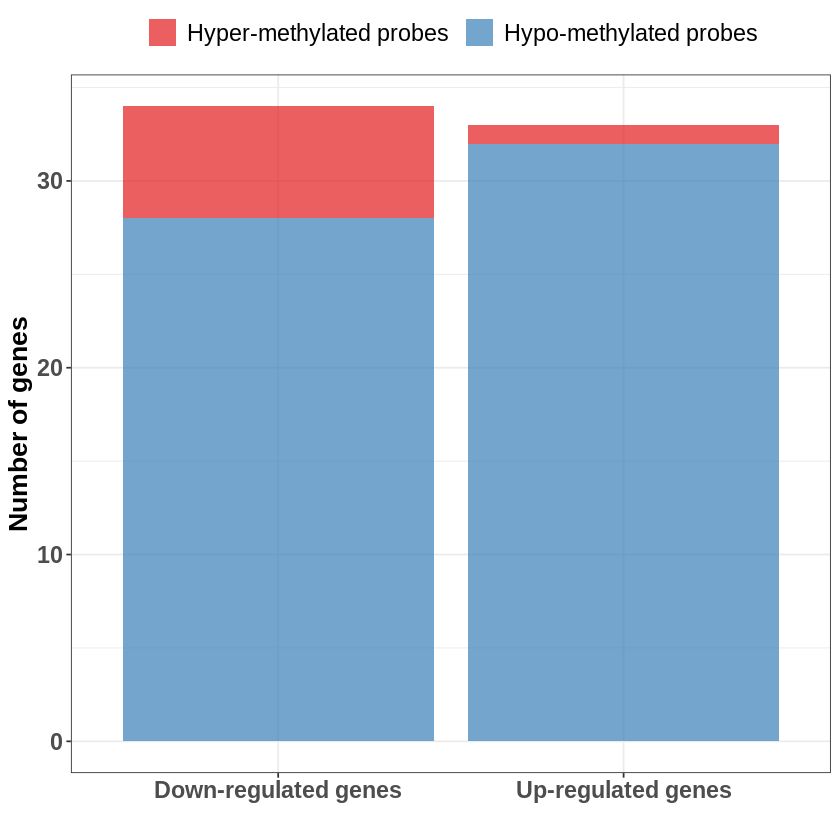

In [54]:
ggplot(deg.acp, aes(x = Exp, fill = Meth)) +
  geom_bar(alpha = 0.7) +
  scale_fill_brewer(palette = "Set1") +
  theme_bw() +
  theme(
    text = element_text(size = 12),
    legend.position = "top",
    legend.box = "vertical",
    legend.text = element_text(size = 14),
    axis.text = element_text(size = 14, face = "bold"),
    axis.title = element_text(size = 16, face = "bold")
  ) +
  labs(x = "", y = "Number of genes", fill = "")


#1.FIGURE_1.E

##Scatter plot between Log2FC expression gene and Delta Beta value

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


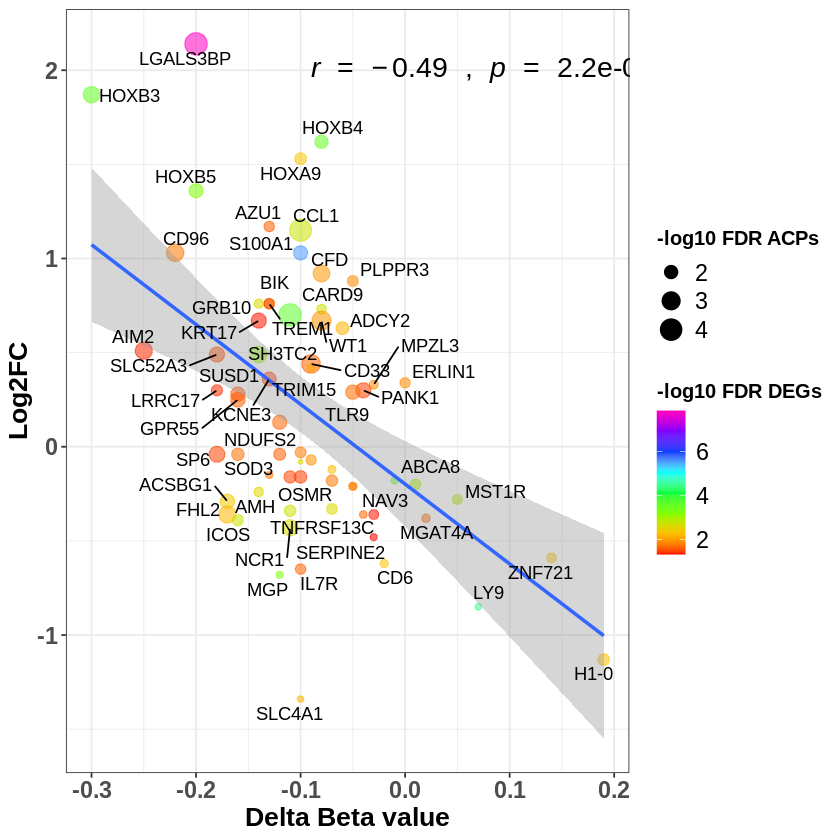

In [64]:
deg.acp$rlogqvalue.x <- -log10(deg.acp$qvalue.x)
deg.acp$rlogqvalue.y <- -log10(deg.acp$qvalue.y)

ggplot(deg.acp, aes(x = Delta, y = Log2FC)) +
  geom_point(aes(color = rlogqvalue.x, size = rlogqvalue.y, alpha = 0.5)) +
  labs(
    y = "Log2FC",
    x = "Delta Beta value",
    color = "-log10 FDR DEGs",
    size = "-log10 FDR ACPs"
  ) +
  theme_bw() +
  theme(
    text = element_text(size = 12),
    legend.position = "right",
    legend.box = "vertical",
    legend.text = element_text(size = 14),
    legend.title = element_text(face = "bold"),
    axis.text = element_text(size = 14, face = "bold"),
    axis.title = element_text(size = 16, face = "bold")
  ) +
  geom_smooth(method = "lm") +
  stat_cor(
    aes(label = paste(tolower(..r.label..), ..p.label.., sep = "~`,`~")),
    size = 6,
    label.x = -0.09,
    label.y = 2
  ) +
  scale_color_gradientn(colours = rainbow(8)) +
  geom_text_repel(aes(label = gene)) + guides(alpha = FALSE)